In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50) #to show more rows
pd.set_option('display.max_columns', 50) #to show more columns

stud_math=pd.read_csv('stud_math.csv')
stud_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [2]:
df = pd.DataFrame([[None, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))
df.astype(str).fillna(0)

,A,B,C,D
0,nan,2.0,nan,0
1,3.0,4.0,nan,1
2,nan,nan,nan,5
3,nan,3.0,nan,4


In [3]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [4]:
stud_math.isnull().sum() 

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

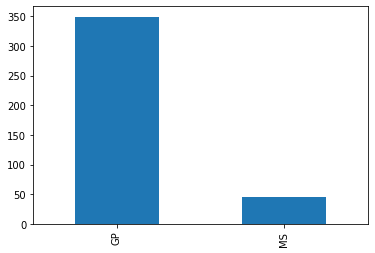

In [5]:
stud_math.school.nunique()
stud_math.school.describe()
stud_math.school.value_counts().plot(kind='bar')


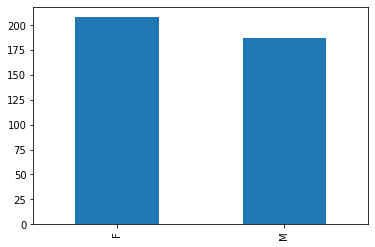

In [6]:
stud_math.sex.describe()
stud_math.sex.value_counts().plot(kind='bar')


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

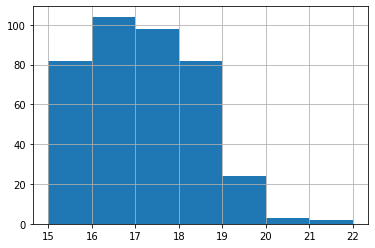

In [7]:
stud_math.age.hist(bins=7)
stud_math.age.describe()

In [8]:
median=stud_math.age.median()
perc25=stud_math.age.quantile(0.25)
perc75=stud_math.age.quantile(0.75)
IQR=perc75-perc25
print('25% percentile:{},'.format(perc25), '75% percentile:{},'.format(perc75), 'IQR:{},'.format(IQR), 'limits of outliers: [{f},{l}]'.format(f=perc25-1.5*IQR, l=perc75+1.5*IQR))
outliers_age=stud_math.age.loc[stud_math.age>21]

print('there are {} pupils older then 21 years old'.format(len(outliers_age)))




25% percentile:16.0, 75% percentile:18.0, IQR:2.0, limits of outliers: [13.0,21.0]
there are 1 pupils older then 21 years old


U    295
R     83
Name: address, dtype: int64

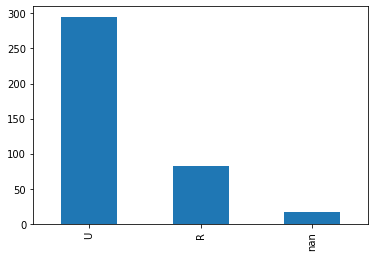

In [9]:
stud_math.address=stud_math.address.apply(lambda x: None if str(x).strip() == '' else x)
stud_math.address.astype(str).value_counts().plot(kind='bar')
stud_math.address.value_counts()


U    312
R     83
Name: address, dtype: int64

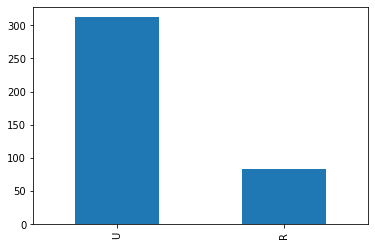

In [10]:
stud_math.address.fillna('U', inplace=True)
stud_math.address.astype(str).value_counts().plot(kind='bar')
stud_math.address.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64


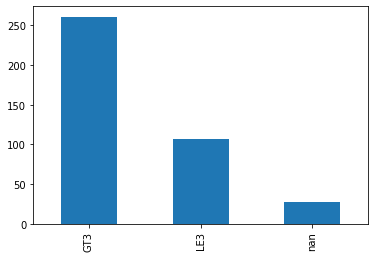

In [11]:
stud_math.famsize=stud_math.famsize.apply(lambda x: None if str(x).strip() == '' else x)
print(stud_math.famsize.value_counts())
stud_math.famsize.astype(str).value_counts().plot(kind='bar')

GT3    288
LE3    107
Name: famsize, dtype: int64

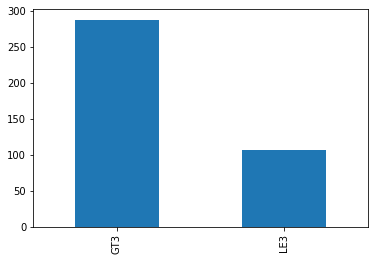

In [12]:
stud_math.famsize=stud_math.famsize.fillna(value='GT3') 
stud_math.famsize.value_counts().plot(kind='bar')
stud_math.famsize.value_counts()


T    314
A     36
Name: Pstatus, dtype: int64

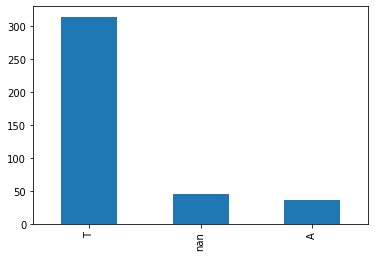

In [13]:
stud_math.Pstatus=stud_math.Pstatus.apply(lambda x: None if str(x).strip() == '' else x)
stud_math.Pstatus.astype(str).value_counts().plot(kind='bar')
stud_math.Pstatus.value_counts()

T    359
A     36
Name: Pstatus, dtype: int64

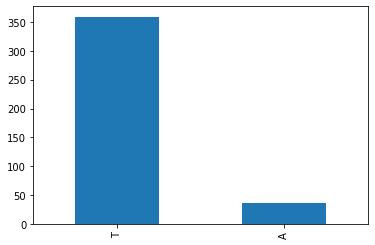

In [14]:
stud_math.Pstatus=stud_math.Pstatus.fillna(value='T') 
stud_math.Pstatus.astype(str).value_counts().plot(kind='bar')
stud_math.Pstatus.value_counts()


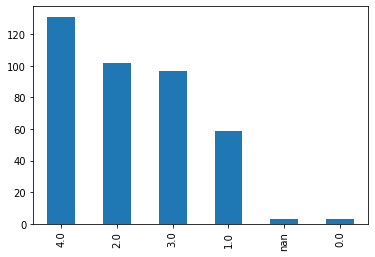

In [15]:
stud_math.Medu=stud_math.Medu.apply(lambda x: None if str(x).strip() == '' else x)
stud_math.Medu.astype(str).value_counts().plot(kind='bar')


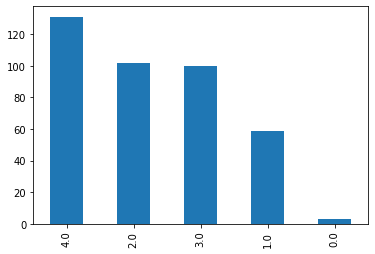

In [16]:
medu_med=stud_math.Medu.median()
stud_math.Medu.fillna(medu_med, inplace=True)
stud_math.Medu.astype(str).value_counts().plot(kind='bar')


2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

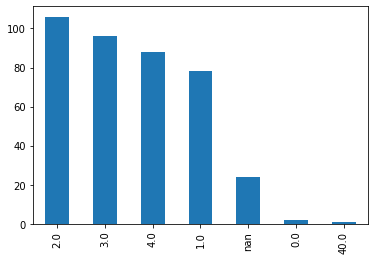

In [17]:
stud_math.Fedu=stud_math.Fedu.apply(lambda x: None if str(x).strip() == '' else x)
stud_math.Fedu.astype(str).value_counts().plot(kind='bar')
stud_math.Fedu.value_counts()


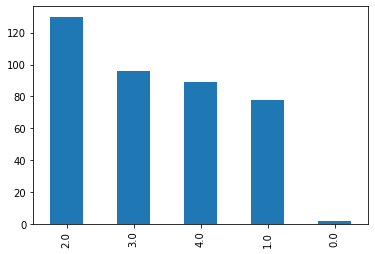

In [18]:
fedu_med=stud_math.Fedu.median()
stud_math.Fedu.replace(40.0, 4, inplace=True)
stud_math.Fedu.fillna(fedu_med, inplace=True)
stud_math.Fedu.astype(str).value_counts().plot(kind='bar')

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

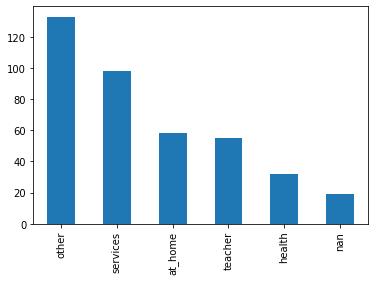

In [19]:
stud_math.Mjob=stud_math.Mjob.apply(lambda x: None if str(x).strip() == '' else x)
stud_math.Mjob.astype(str).value_counts().plot(kind='bar')
stud_math.Mjob.value_counts()

other       152
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

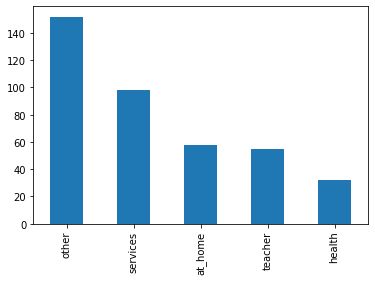

In [20]:
stud_math.Mjob.fillna('other', inplace=True)
stud_math.Mjob.astype(str).value_counts().plot(kind='bar')
stud_math.Mjob.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

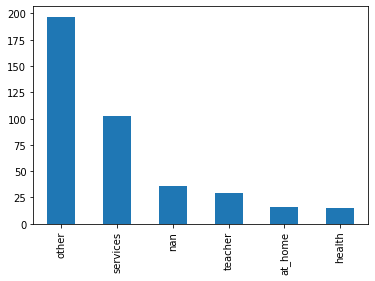

In [21]:
stud_math.Fjob=stud_math.Fjob.apply(lambda x: None if str(x).strip() == '' else x)
stud_math.Fjob.astype(str).value_counts().plot(kind='bar')
stud_math.Fjob.value_counts()

other       233
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

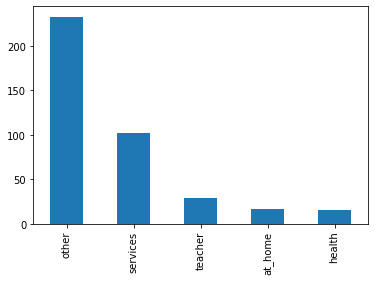

In [22]:
stud_math.Fjob.fillna('other', inplace=True)
stud_math.Fjob.astype(str).value_counts().plot(kind='bar')
stud_math.Fjob.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

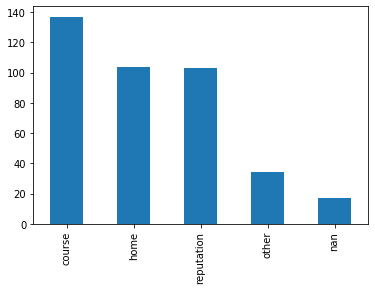

In [23]:
stud_math.reason=stud_math.reason.apply(lambda x: None if str(x).strip() == '' else x)
stud_math.reason.astype(str).value_counts().plot(kind='bar')
stud_math.reason.value_counts()

course        137
home          104
reputation    103
other          51
Name: reason, dtype: int64

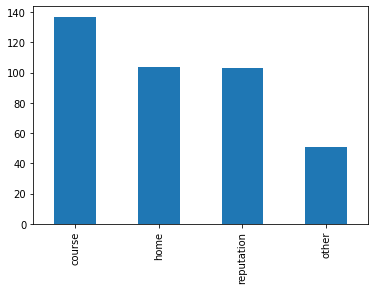

In [24]:
stud_math.reason.fillna('other', inplace=True)
stud_math.reason.astype(str).value_counts().plot(kind='bar')
stud_math.reason.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

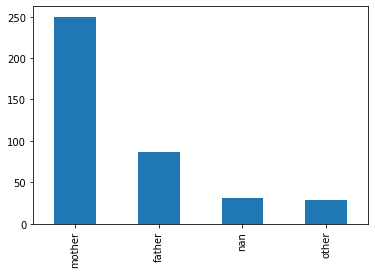

In [25]:
stud_math. guardian=stud_math. guardian.apply(lambda x: None if str(x).strip() == '' else x)
stud_math. guardian.astype(str).value_counts().plot(kind='bar')
stud_math. guardian.value_counts()

mother    250
father     86
other      59
Name: guardian, dtype: int64

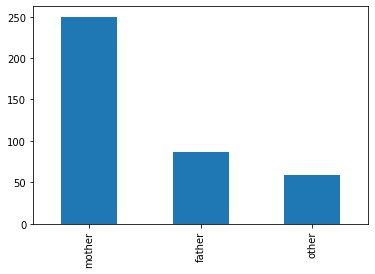

In [26]:
stud_math. guardian.fillna('other', inplace=True)
stud_math. guardian.astype(str).value_counts().plot(kind='bar')
stud_math. guardian.value_counts()

To copy-paste less and reduce boilerpate let's extract code to functions:

In [27]:
def data_ask(x):
    x1 = x.apply(lambda x: None if str(x).strip() == '' else x)
    print(x1.value_counts())
    x1.astype(str).value_counts().plot(kind='bar')
    return x1

In [28]:
def data_corr(b, repl):
    b1=b.fillna(repl)
    print(b1.value_counts())
    b1.astype(str).value_counts().plot(kind='bar')
    return  b1

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


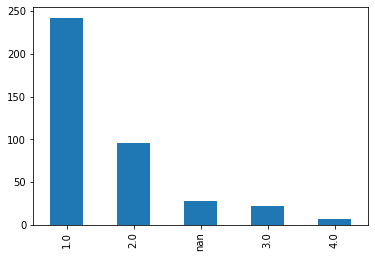

In [29]:
stud_math.traveltime=data_ask(stud_math.traveltime)

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


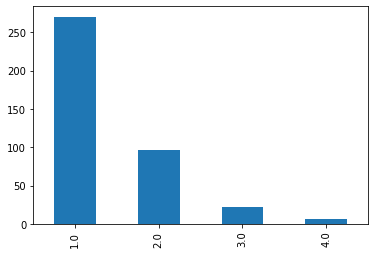

In [30]:

stud_math.traveltime=data_corr(stud_math.traveltime,1)

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64


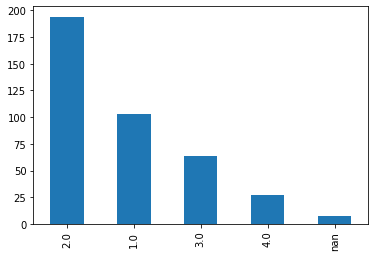

In [31]:
stud_math.studytime=data_ask(stud_math.studytime)

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64


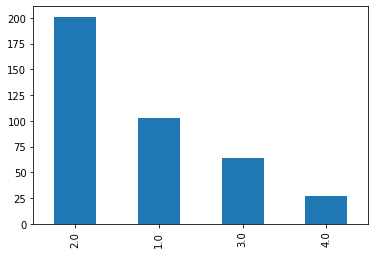

In [32]:
stud_math.studytime=data_corr(stud_math.studytime, stud_math.studytime.median())

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64


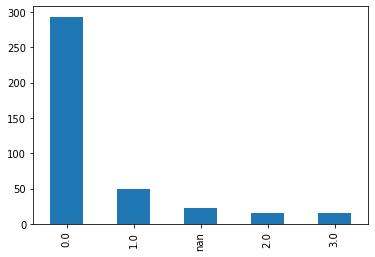

In [33]:
stud_math.failures=data_ask(stud_math.failures)

0.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64


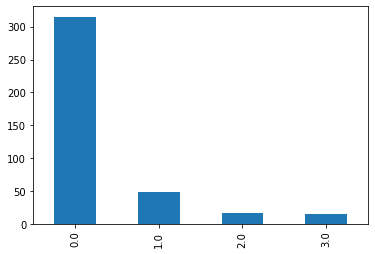

In [34]:
stud_math.failures=data_corr(stud_math.failures, 0.0)

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


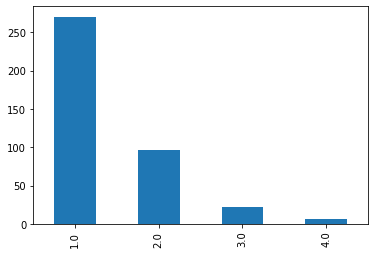

In [35]:
stud_math.schoolsup=data_ask(stud_math.traveltime)

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


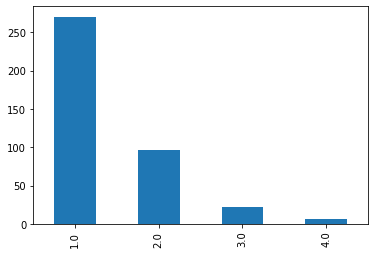

In [36]:
stud_math.schoolsup=data_corr(stud_math.traveltime,stud_math.schoolsup.median())

no     200
yes    155
Name: paid, dtype: int64


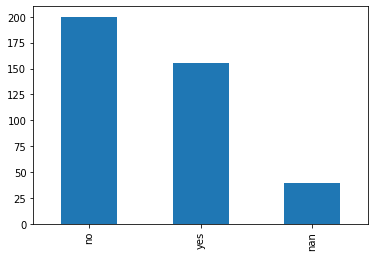

In [37]:
stud_math.paid=data_ask(stud_math.paid)

In [38]:

stud_math.paid=stud_math.paid.apply(lambda x: float(1.0) if x=="yes" else  float(0.0))
stud_math.paid

0      0.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
390    1.0
391    0.0
392    0.0
393    0.0
394    0.0
Name: paid, Length: 395, dtype: float64

In [39]:
stud_math.paid.corr(stud_math.score)

0.0963058282977535

In [40]:
#stud_math.paid.mask(stud_math.paid.isnull(), np.random.uniform(0.0, 1.0))#, size=series.shape))
#choice(['win', 'lose', 'draw']) 
#stud_math.paid=stud_math.paid.mask(stud_math.paid.isnull(), random.choice([0.0, 1.0]))#, size=series.shape))
print(stud_math.paid[(stud_math.paid!=1)&(stud_math.paid!=0)])




Series([], Name: paid, dtype: float64)


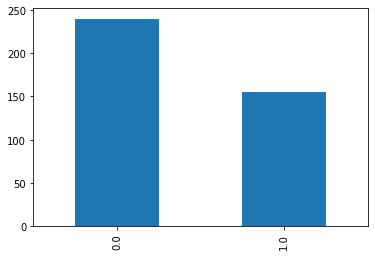

In [41]:
stud_math.paid.value_counts().plot(kind='bar')

In [42]:
#####################################################

yes    195
no     186
Name: activities, dtype: int64


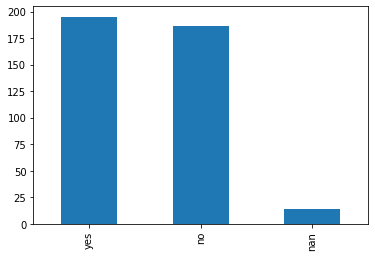

In [43]:
stud_math.activities=data_ask(stud_math.activities)

yes    195
no     186
1       14
Name: activities, dtype: int64


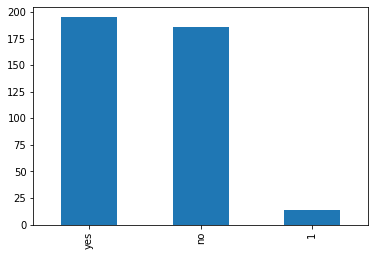

In [44]:
stud_math.activities=data_corr(stud_math.activities,1)

In [45]:
###########################################

yes    300
no      79
Name: nursery, dtype: int64


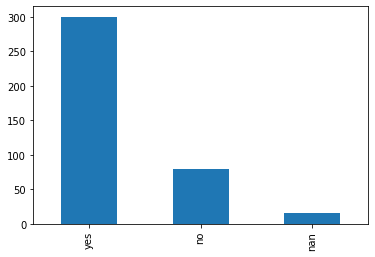

In [46]:
stud_math.nursery=data_ask(stud_math.nursery)

yes    316
no      79
Name: nursery, dtype: int64


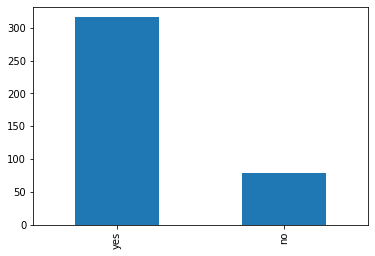

In [47]:
stud_math.nursery=data_corr(stud_math.nursery,'yes')

yes    305
no      56
Name: internet, dtype: int64


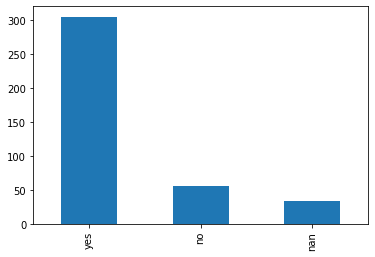

In [48]:
stud_math. internet=data_ask(stud_math.internet)

yes    339
no      56
Name: internet, dtype: int64


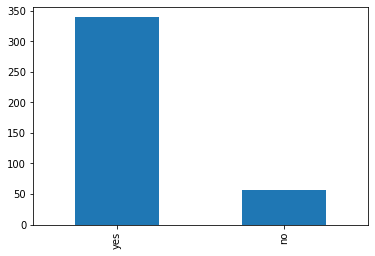

In [49]:
stud_math. internet=data_corr(stud_math.internet,'yes')

no     240
yes    124
Name: romantic, dtype: int64


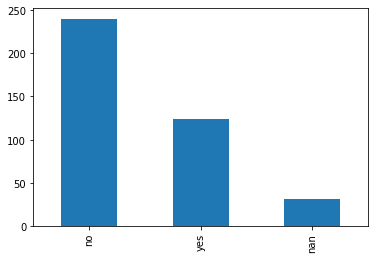

In [50]:
stud_math.romantic=data_ask(stud_math. romantic)

no     271
yes    124
Name: romantic, dtype: int64


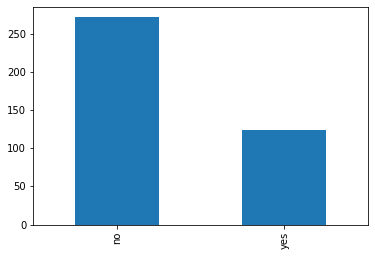

In [51]:
stud_math.romantic=data_corr(stud_math.romantic,'no')

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64


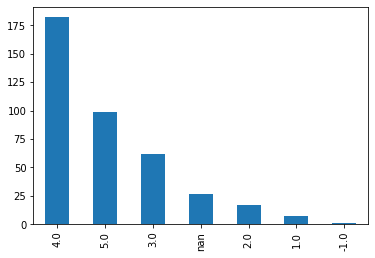

In [52]:
stud_math.famrel=data_ask(stud_math.famrel)

4.0    209
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64


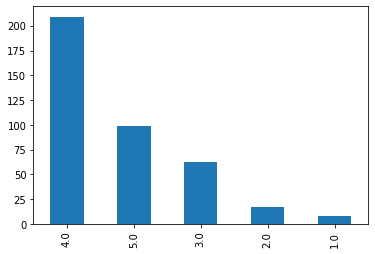

In [53]:
stud_math.famrel.replace(-1.0, 1.0, inplace=True)
stud_math.famrel=data_corr(stud_math.famrel,4.0)

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64


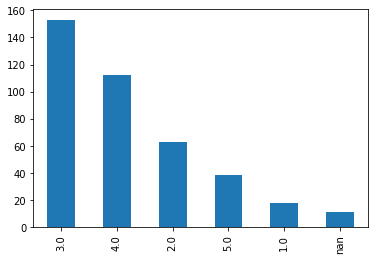

In [54]:
stud_math.freetime=data_ask(stud_math.freetime)

3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64


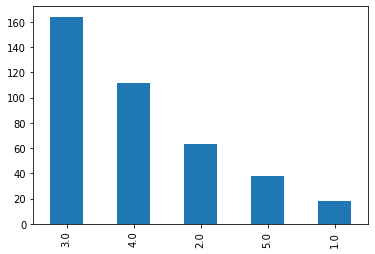

In [55]:
stud_math.freetime=data_corr(stud_math. freetime, stud_math.freetime.median())

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64


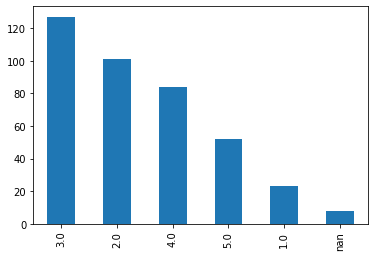

In [56]:
stud_math.goout=data_ask(stud_math.goout)

3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64


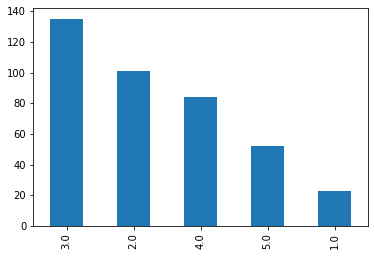

In [57]:
stud_math.goout=data_corr(stud_math.goout, stud_math.goout.median())

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


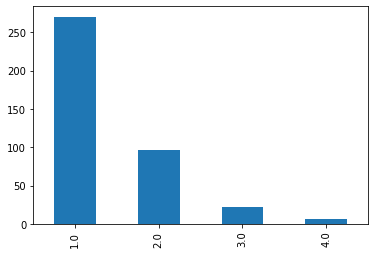

In [58]:
stud_math.traveltime=data_ask(stud_math.traveltime)

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


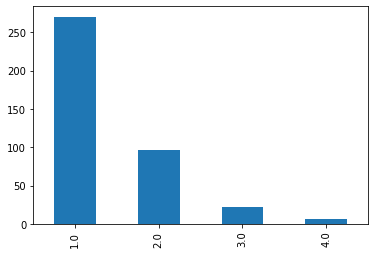

In [59]:
stud_math.traveltime=data_corr(stud_math.traveltime,1.0)

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64


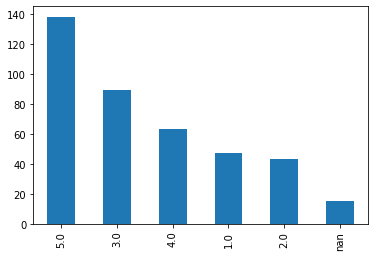

In [60]:
stud_math.health=data_ask(stud_math.health)

5.0    153
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64


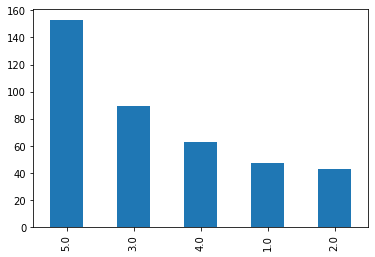

In [61]:
stud_math.health=data_corr(stud_math.health, 5.0)
######################################################################

In [62]:
############################################################

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

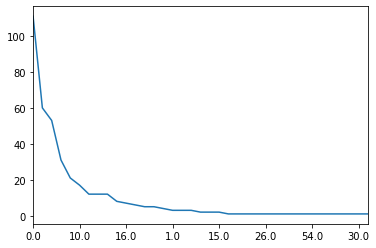

In [63]:
stud_math.absences=stud_math.absences.apply(lambda x: None if str(x).strip() == '' else x)
stud_math.absences.astype(str).value_counts().plot()
stud_math.absences.fillna(0)
stud_math.absences.describe()




50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64


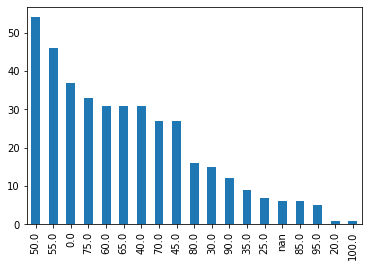

In [64]:
stud_math.score=data_ask(stud_math.score)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
1.0       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64


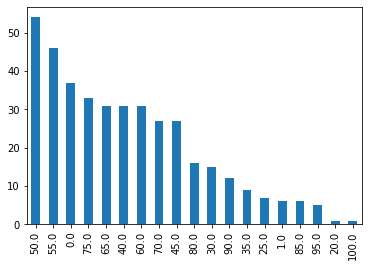

In [65]:
stud_math.score=data_corr(stud_math.score,1)

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


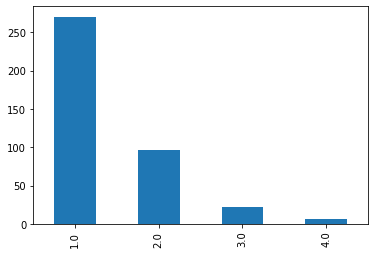

In [66]:
stud_math.traveltime=data_ask(stud_math.traveltime)

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


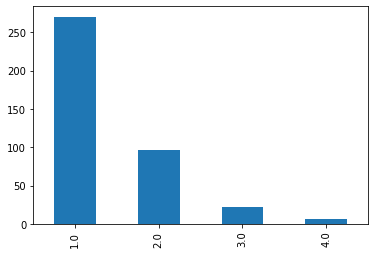

In [67]:
stud_math.traveltime=data_corr(stud_math.traveltime,1)

In [68]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,paid,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161375,-0.154781,0.084755,-0.015355,0.228081,0.084755,-0.015913,0.015556,0.065250,0.026443,0.134069,-0.060506,0.093592,-0.185881
Medu,-0.161375,1.000000,0.593116,-0.160877,0.077050,-0.245110,-0.160877,0.144500,-0.077638,-0.013853,0.026210,0.063361,-0.063796,-0.012183,0.232749
Fedu,-0.154781,0.593116,1.000000,-0.120629,0.007754,-0.260690,-0.120629,0.071629,-0.007778,-0.024077,-0.029868,0.039084,-0.009862,0.023564,0.139649
traveltime,0.084755,-0.160877,-0.120629,1.000000,-0.094637,0.049670,1.000000,-0.039612,0.095724,-0.019040,-0.012496,0.051775,-0.044325,-0.040324,-0.066565
studytime,-0.015355,0.077050,0.007754,-0.094637,1.000000,-0.166598,-0.094637,0.212199,-1.000000,0.037638,-0.119014,-0.051090,-0.064860,-0.026502,0.104886
failures,0.228081,-0.245110,-0.260690,0.049670,-0.166598,1.000000,0.049670,-0.160427,0.168020,-0.017230,0.094826,0.113649,0.072497,0.057952,-0.347479
schoolsup,0.084755,-0.160877,-0.120629,1.000000,-0.094637,0.049670,1.000000,-0.039612,0.095724,-0.019040,-0.012496,0.051775,-0.044325,-0.040324,-0.066565
paid,-0.015913,0.144500,0.071629,-0.039612,0.212199,-0.160427,-0.039612,1.000000,-0.214730,-0.010470,-0.041945,0.046581,-0.066995,-0.007456,0.096162
"studytime, granular",0.015556,-0.077638,-0.007778,0.095724,-1.000000,0.168020,0.095724,-0.214730,1.000000,-0.038152,0.120774,0.051585,0.065370,0.026544,-0.106271
famrel,0.065250,-0.013853,-0.024077,-0.019040,0.037638,-0.017230,-0.019040,-0.010470,-0.038152,1.000000,0.165324,0.074217,0.090195,-0.081882,0.036146


C:\Users\trigu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\trigu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


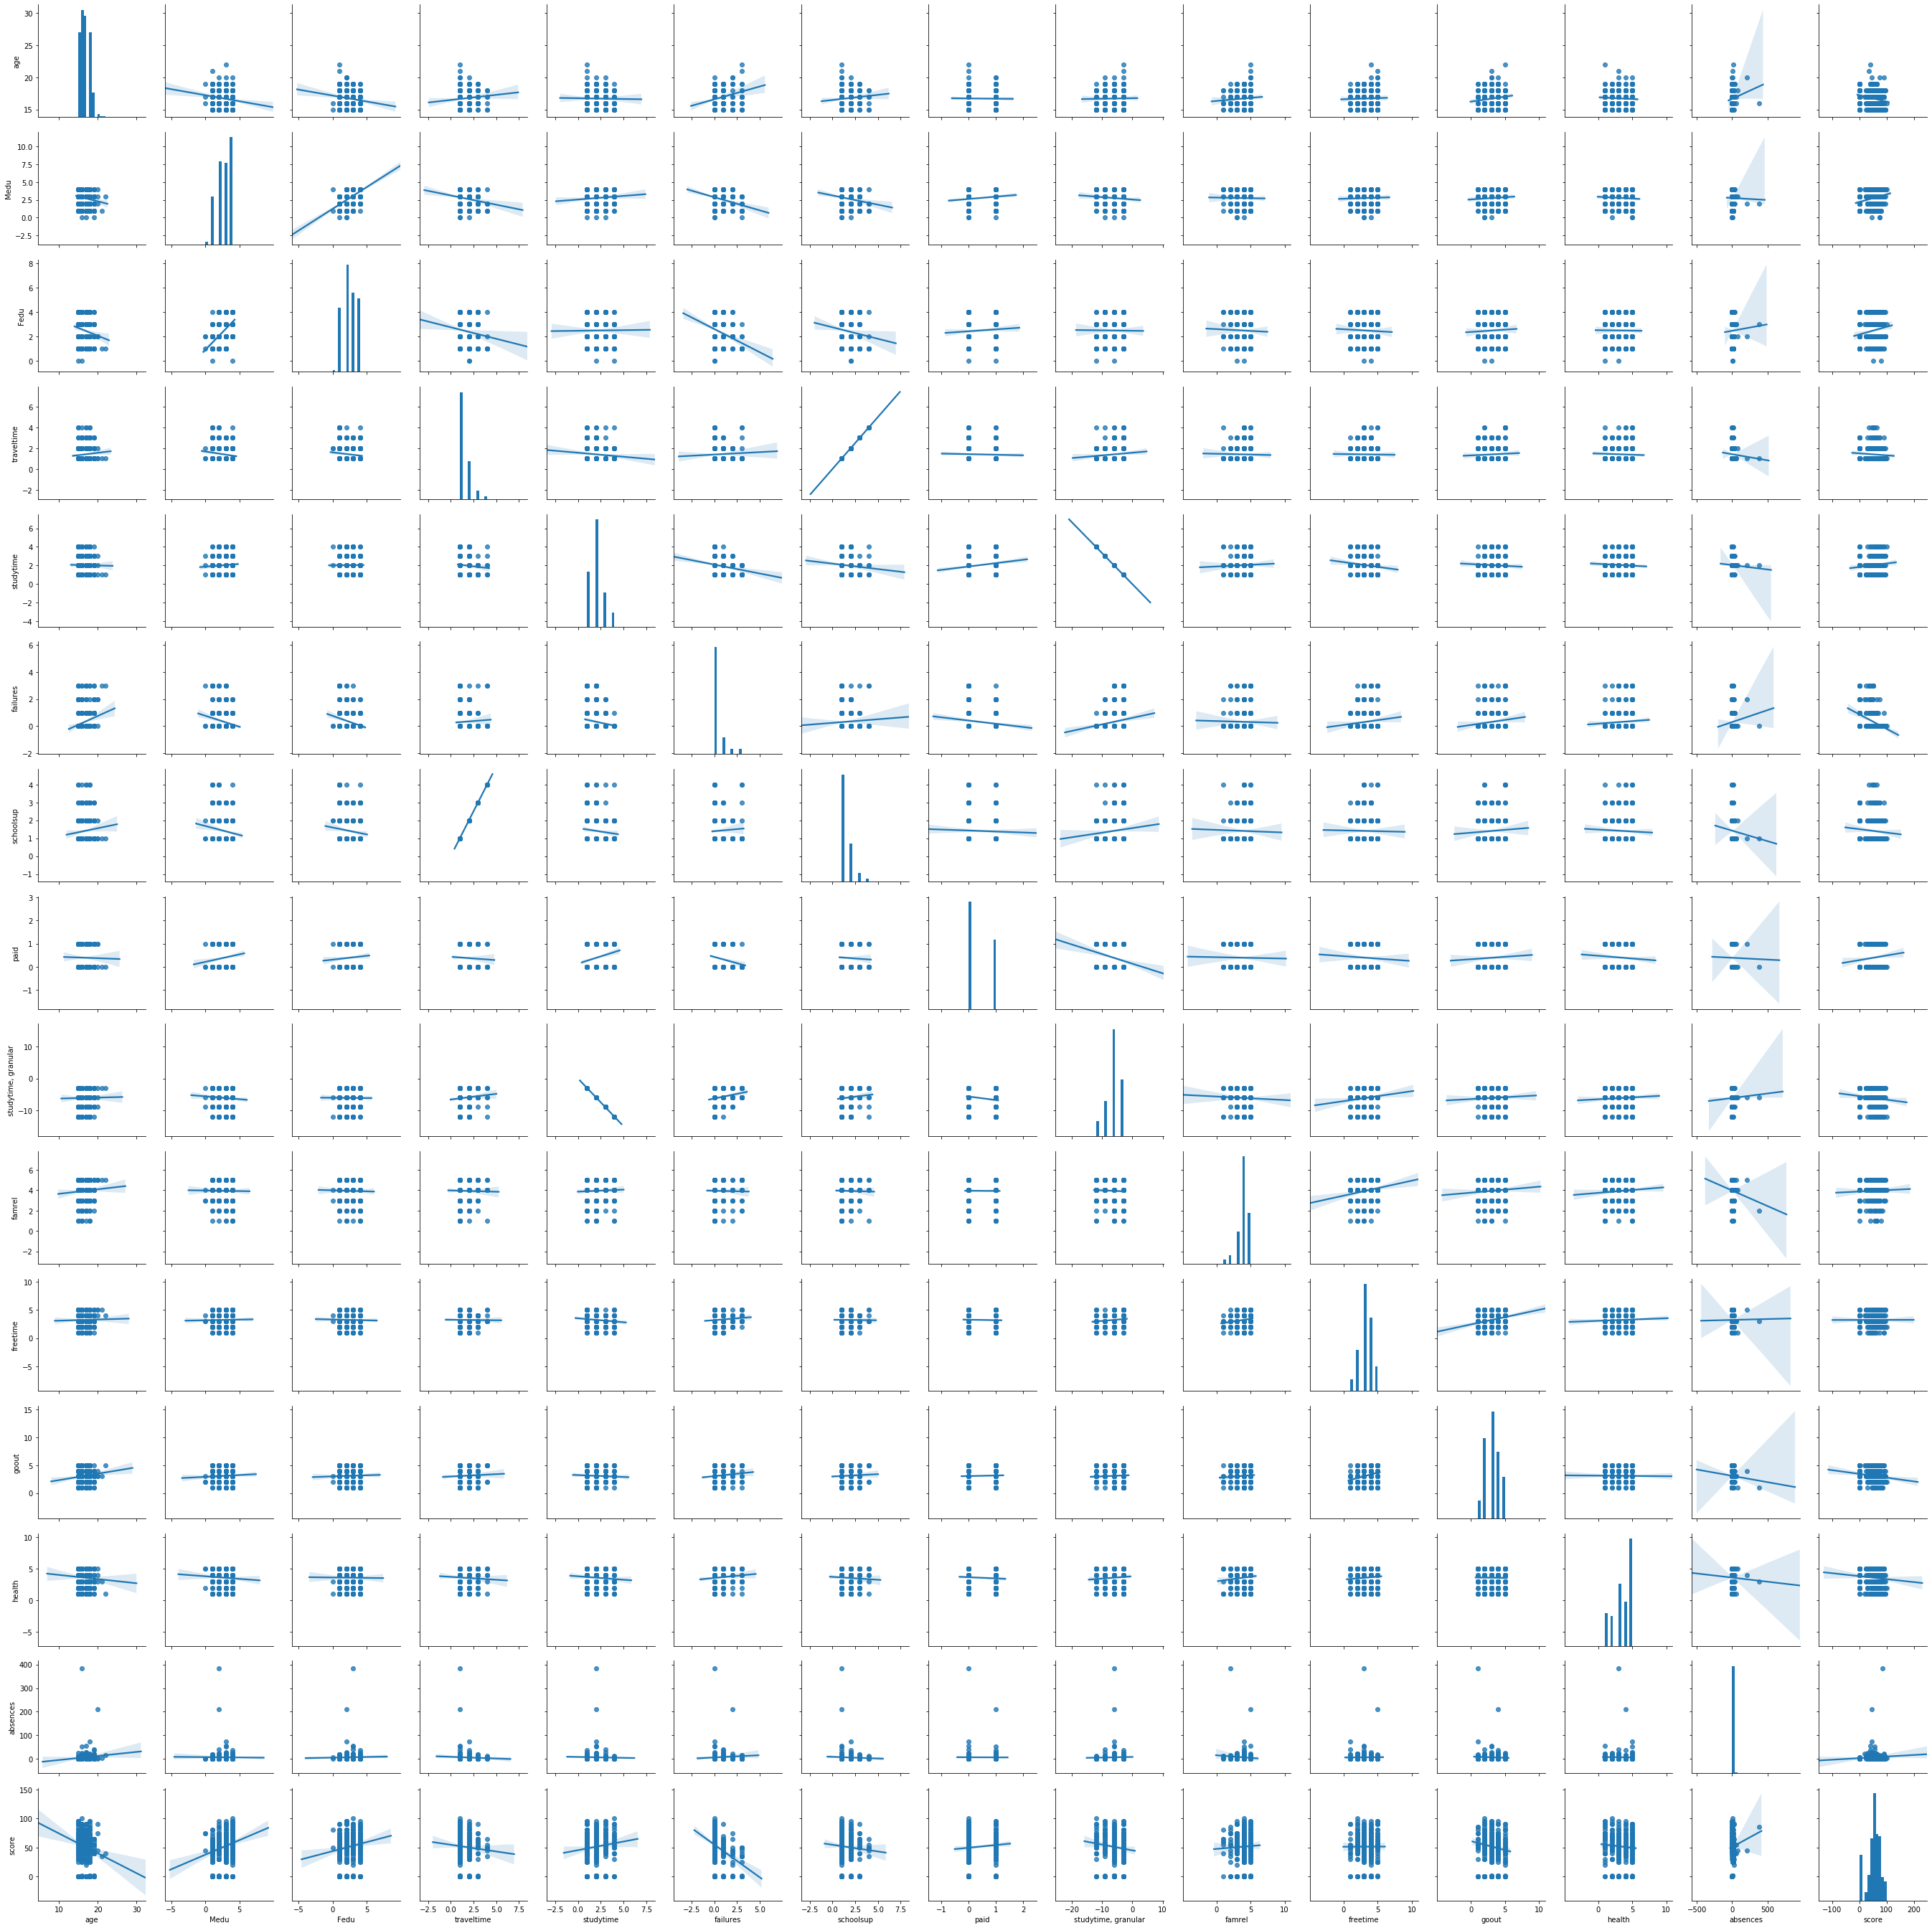

In [69]:
sns.pairplot(stud_math, kind='reg')

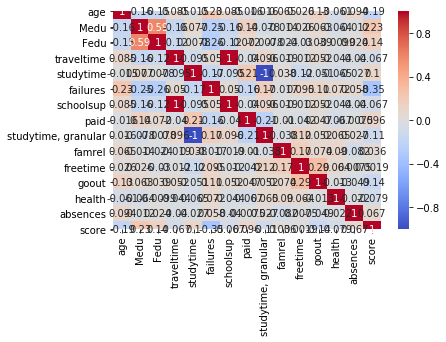

In [70]:
correlation=stud_math.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')